In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

Using TensorFlow backend.


In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

### Data is downloaded from kaggle: 

In [3]:
df_train = pd.read_csv('C:\\Users\\yogit\\OneDrive\\Documents\\diabetic-retinopathy-detection\\trainlabels\\trainLabels.csv')

### Lets take a look at all the labels. '10_left' is a name of the file whereas '0/1/2/3/4' are the labels '10_left' image of the left eye '10_right' image of the right eye for the same person

In [4]:
df_train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [5]:
df_train.tail()

,image,level
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0
35125,44349_right,1


In [6]:
targets_series = pd.Series(df_train['level'])
one_hot = pd.get_dummies(targets_series, sparse = True)

### There are 5 types of labels 0/1/2/3/4, thry are distinguished as below 
### NDPR - Non Proliferative Diabetic Retinopathy
### Class Name 0 Normal
### 1 Mild NPDR 2 Moderate NPDR 3 Severe NPDR
### 4 PDR

In [7]:
one_hot_labels = np.asarray(one_hot)

In [8]:
one_hot_labelsY = np.asarray(targets_series)

In [9]:
one_hot_labelsY[:10]

array([0, 0, 0, 0, 1, 2, 4, 4, 0, 1], dtype=int64)

In [10]:

x_train = []
y_train = []
x_test = []

In [11]:
df_test = []

In [12]:

df_test = df_train[:20000]

In [18]:
i=0
for f, breed in tqdm(df_test.values):
    try:
        img = image.load_img(('C:\\Users\\yogit\\OneDrive\\Documents\\diabetic-retinopathy-detection\\train\\train\\{}.jpeg'.format(f)), target_size=(128, 128))
        arr = image.img_to_array(img)
        label = one_hot_labelsY[i]
        x_train.append(arr)
        y_train.append(label)
        i += 1 
    except:
        pass

100%|██████████| 20000/20000 [30:27<00:00, 10.95it/s]


In [19]:
len(x_train)

20000

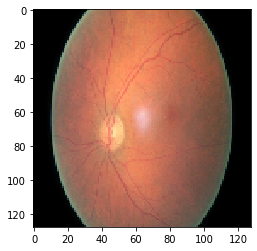

In [20]:
from matplotlib import pyplot as plt
plt.imshow(x_train[10011]/255)
plt.show()

In [37]:

x_valid = []
y_valid = []

In [38]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [39]:
y_train_raw = np.array(Y_train)

In [40]:
x_train_raw = np.array(X_train)

In [41]:
visible = Input(shape=(128,128,3))
conv6 = Conv2D(16, kernel_size=(6,6), activation='relu')(visible)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv6)
bat1 = BatchNormalization(axis = 1)(pool3)

conv2 = Conv2D(64, kernel_size=(4,4), activation='relu')(pool3)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=(2,2), activation='relu')(pool2)
conv4 = Conv2D(128, kernel_size=(2,2), activation='relu')(conv3)
conv5 = Conv2D(256, kernel_size=(2,2), activation='relu')(conv4)

#pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(conv5)
hidden1 = Dense(128, activation='relu')(flat)
drop1 = Dropout(0.2)(hidden1)

hidden2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)
output = Dense(5, activation='sigmoid')(drop2)
#output = Dense(1, activation='sigmoid')(flat)
model = Model(inputs=visible, outputs=output)

In [42]:
from keras import optimizers
opt = optimizers.adam(lr=0.001, decay=0.0)

In [43]:
model.compile(optimizer= opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 123, 123, 16)      1744      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 58, 58, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 64)        16448     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 27, 27, 128)       32896     
__________

In [30]:
with tf.device('/device:GPU:0'):    
    model.fit(x_train_raw, y_train_raw, batch_size=128, epochs=5, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
18000/18000 [==============================] - ETA: 21:04 - loss: 2.4854 - acc: 0.08 - ETA: 14:12 - loss: 2.7278 - acc: 0.37 - ETA: 12:40 - loss: 2.6222 - acc: 0.51 - ETA: 11:58 - loss: 2.6025 - acc: 0.56 - ETA: 10:53 - loss: 2.4376 - acc: 0.58 - ETA: 10:35 - loss: 2.3408 - acc: 0.60 - ETA: 10:26 - loss: 2.2876 - acc: 0.61 - ETA: 10:21 - loss: 2.2268 - acc: 0.63 - ETA: 10:01 - loss: 2.2059 - acc: 0.64 - ETA: 9:49 - loss: 2.2100 - acc: 0.6594 - ETA: 9:28 - loss: 2.1879 - acc: 0.669 - ETA: 9:24 - loss: 2.1765 - acc: 0.673 - ETA: 9:07 - loss: 2.1577 - acc: 0.679 - ETA: 9:02 - loss: 2.1223 - acc: 0.680 - ETA: 8:53 - loss: 2.1579 - acc: 0.683 - ETA: 8:46 - loss: 2.1647 - acc: 0.687 - ETA: 8:39 - loss: 2.2004 - acc: 0.691 - ETA: 8:34 - loss: 2.2247 - acc: 0.693 - ETA: 8:29 - loss: 2.2408 - acc: 0.694 - ETA: 8:20 - loss: 2.2612 - acc: 0.699 - ETA: 8:13 - loss: 2.2432 - acc: 0.700 - ETA: 8

In [48]:
x_valid_raw = np.array(X_valid)

In [49]:
y_valid_raw = np.array(Y_valid)

In [50]:
test_loss, test_acc = model.evaluate(x_valid_raw, y_valid_raw)

2000/2000 [==============================] - ETA: 1: - ETA: 55s - ETA: 41 - ETA: 35 - ETA: 32 - ETA: 29 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 24s 12ms/step


In [51]:
test_loss

1.8907573738098145

In [52]:
test_acc

0.0235